# Example output from stroke outcome model

In this notebook we provide an example of the output from the stroke outcome model assuming IVT is delivered at 90 mins and MT is delivered at 120 mins after stroke onset.

The model provides a sample distribution of mRS scores for 1,000 patients.

## Load packages and data file

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from outcome_utilities.clinical_outcome import Clinical_outcome

import warnings
warnings.filterwarnings("ignore")

# Load mRS distributions
mrs_dists = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')

## View the loaded mRS distributions
For each stroke type (by row) the the imported table shows the cumulative proportion of patients with each mRS score (0-6)

In [2]:
mrs_dists

,0,1,2,3,4,5,6
Stroke type,,,,,,,
pre_stroke_nlvo,0.582881,0.745419,0.848859,0.951082,0.993055,1.000000,1.0
pre_stroke_nlvo_ivt_deaths,0.576469,0.737219,0.839522,0.940620,0.982131,0.989000,1.0
pre_stroke_lvo,0.417894,0.560853,0.679283,0.843494,0.957269,1.000000,1.0
pre_stroke_lvo_ivt_deaths,0.403644,0.541728,0.656119,0.814731,0.924626,0.965900,1.0
pre_stroke_lvo_mt_deaths,0.402850,0.540662,0.654829,0.813128,0.922807,0.964000,1.0
no_treatment_nlvo,0.197144,0.460000,0.580032,0.707768,0.855677,0.917702,1.0
no_effect_nlvo_ivt_deaths,0.197271,0.460000,0.577583,0.702252,0.845244,0.904454,1.0
t0_treatment_nlvo_ivt,0.429808,0.630000,0.738212,0.848427,0.929188,0.956300,1.0
no_treatment_lvo,0.050000,0.129000,0.265000,0.429000,0.676000,0.811000,1.0


## Set up outcome model and get output

In [3]:
# Set up outcome model
outcome_model = Clinical_outcome(mrs_dists, patients=1000)

# Get outputs
time_to_ivt = 90
time_to_mt = 120
outcomes = outcome_model.calculate_outcomes(time_to_ivt, time_to_mt)

## Show raw model output

The model output is a dictionary of results.

In [4]:
outcomes

{'lvo_untreated_probs': array([0.037, 0.098, 0.14 , 0.154, 0.245, 0.121, 0.205]),
 'nlvo_untreated_probs': array([0.191, 0.265, 0.119, 0.133, 0.156, 0.053, 0.083]),
 'lvo_ivt_probs': array([0.082, 0.098, 0.127, 0.163, 0.217, 0.1  , 0.213]),
 'lvo_mt_probs': array([0.214, 0.112, 0.139, 0.183, 0.152, 0.087, 0.113]),
 'nlvo_ivt_probs': array([0.369, 0.214, 0.12 , 0.117, 0.092, 0.031, 0.057]),
 'lvo_untreated_mean_utility': 0.33643999999999996,
 'nlvo_untreated_mean_utility': 0.6008100000000001,
 'lvo_ivt_mean_utility': 0.37381,
 'lvo_mt_mean_utility': 0.5235199999999999,
 'nlvo_ivt_mean_utility': 0.7119099999999999,
 'lvo_ivt_added_utility': 0.037370000000000014,
 'lvo_mt_added_utility': 0.1870799999999999,
 'nlvo_ivt_added_utility': 0.11109999999999987,
 'lvo_untreated_cum_probs': array([0.037, 0.135, 0.275, 0.429, 0.674, 0.795, 1.   ]),
 'nlvo_untreated_cum_probs': array([0.191, 0.456, 0.575, 0.708, 0.864, 0.917, 1.   ]),
 'lvo_ivt_cum_probs': array([0.082, 0.18 , 0.307, 0.47 , 0.687, 0

## Plot mRS distributions

mRS distributions

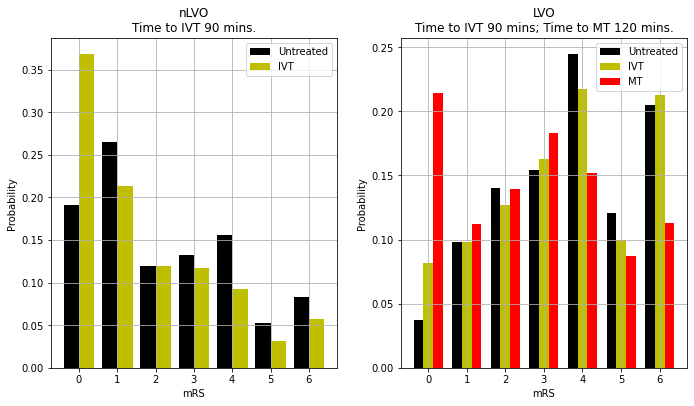

In [5]:
fig = plt.figure(figsize=(10,6))

# nLVO
x = np.arange(7)
width = 0.4
ax1 = fig.add_subplot(121)
y = outcomes['nlvo_untreated_probs']
ax1.bar(x - width/2, y, width = width, label='Untreated', color='k')
y = outcomes['nlvo_ivt_probs']
ax1.bar(x + width/2, y, width = width, label='IVT', color='y')
title = f'nLVO\nTime to IVT {time_to_ivt} mins.'
ax1.set_title(title)
ax1.set_xlabel('mRS')
ax1.set_ylabel('Probability')
ax1.grid()
ax1.legend()

# LVO
width = 0.25
x = np.arange(7)
ax2 = fig.add_subplot(122)
y = outcomes['lvo_untreated_probs']
ax2.bar(x - width, y, width = width, label='Untreated', color='k')
y = outcomes['lvo_ivt_probs']
ax2.bar(x, y, width = width, label='IVT', color='y')
y = outcomes['lvo_mt_probs']
ax2.bar(x + width, y, width = width, label='MT', color='r')
title = f'LVO\nTime to IVT {time_to_ivt} mins; Time to MT {time_to_mt} mins.'
ax2.set_title(title)
ax2.set_xlabel('mRS')
ax2.set_ylabel('Probability')
ax2.grid()
ax2.legend()

plt.tight_layout(pad=2)
plt.savefig('./images/demo_mrs_dists.jpg', dpi=300)
plt.show()

Cumulative mRS distributions

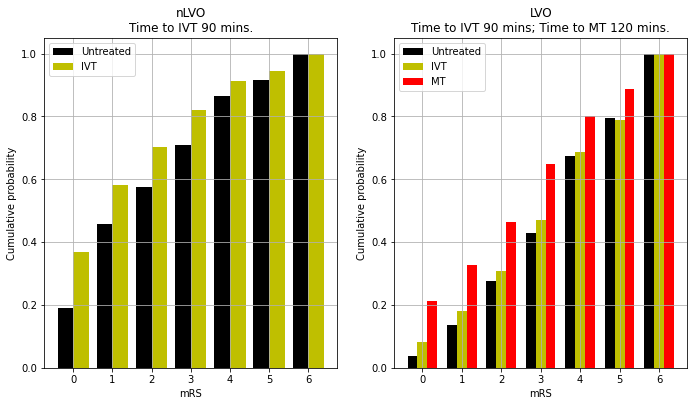

In [6]:
fig = plt.figure(figsize=(10,6))

# nLVO
x = np.arange(7)
width = 0.4
ax1 = fig.add_subplot(121)
y = np.cumsum(outcomes['nlvo_untreated_probs'])
ax1.bar(x - width/2, y, width = width, label='Untreated', color='k')
y = np.cumsum(outcomes['nlvo_ivt_probs'])
ax1.bar(x + width/2, y, width = width, label='IVT', color='y')
title = f'nLVO\nTime to IVT {time_to_ivt} mins.'
ax1.set_title(title)
ax1.set_xlabel('mRS')
ax1.set_ylabel('Cumulative probability')
ax1.grid()
ax1.legend()

# LVO
width = 0.25
x = np.arange(7)
ax2 = fig.add_subplot(122)
y = np.cumsum(outcomes['lvo_untreated_probs'])
ax2.bar(x - width, y, width = width, label='Untreated', color='k')
y = np.cumsum(outcomes['lvo_ivt_probs'])
ax2.bar(x, y, width = width, label='IVT', color='y')
y = np.cumsum(outcomes['lvo_mt_probs'])
ax2.bar(x + width, y, width = width, label='MT', color='r')
title = f'LVO\nTime to IVT {time_to_ivt} mins; Time to MT {time_to_mt} mins.'
ax2.set_title(title)
ax2.set_xlabel('mRS')
ax2.set_ylabel('Cumulative probability')
ax2.grid()
ax2.legend()

plt.tight_layout(pad=2)
plt.savefig('./images/demo_cum_mrs_dists.jpg', dpi=300)
plt.show()

Plot changes in mRS proportions with treatment

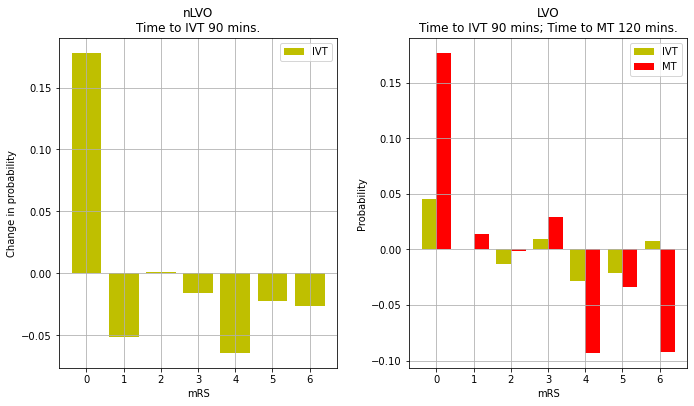

In [7]:
fig = plt.figure(figsize=(10,6))

# nLVO
x = np.arange(7)
width = 0.8
ax1 = fig.add_subplot(121)
y = outcomes['nlvo_ivt_shift']
ax1.bar(x, y, width = width, label='IVT', color='y')
title = f'nLVO\nTime to IVT {time_to_ivt} mins.'
ax1.set_title(title)
ax1.set_xlabel('mRS')
ax1.set_ylabel('Change in probability')
ax1.grid()
ax1.legend()

# LVO
width = 0.4
x = np.arange(7)
ax2 = fig.add_subplot(122)
y = outcomes['lvo_ivt_shift']
ax2.bar(x - width/2, y, width = width, label='IVT', color='y')
y = outcomes['lvo_mt_shift']
ax2.bar(x + width/2, y, width = width, label='MT', color='r')
title = f'LVO\nTime to IVT {time_to_ivt} mins; Time to MT {time_to_mt} mins.'
ax2.set_title(title)
ax2.set_xlabel('mRS')
ax2.set_ylabel('Probability')
ax2.grid()
ax2.legend()

plt.tight_layout(pad=2)
plt.savefig('./images/demo_mrs_shifts.jpg', dpi=300)
plt.show()

## Other stats

### Mean mRS

In [8]:
print('Mean mRS')
print('--------')
print('LVO untreated:', outcomes['lvo_untreated_mean_mRS'])
print('LVO IVT:', outcomes['lvo_ivt_mean_mRS'])
print('LVO MT:', outcomes['lvo_mt_mean_mRS'])
print('nLVO untreated:', outcomes['nlvo_untreated_mean_mRS'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_mRS'])

Mean mRS
--------
LVO untreated: 3.655
LVO IVT: 3.487
LVO MT: 2.66
nLVO untreated: 2.289
nLVO IVT: 1.67


### Mean shift in mRS

In [9]:
print('Mean mRS shift')
print('--------------')
print('LVO IVT:', outcomes['lvo_ivt_mean_shift'])
print('LVO MT:', outcomes['lvo_mt_mean_shift'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_shift'])

Mean mRS shift
--------------
LVO IVT: -0.168
LVO MT: -1.01
nLVO IVT: -0.619


### The proportion of patients with improved mRS
Assuming all patients move up the mRS.

In [10]:
print('Proportion improved')
print('-------------------')
print('LVO IVT:', outcomes['lvo_ivt_improved'])
print('LVO MT:', outcomes['lvo_mt_improved'])
print('nLVO IVT:', outcomes['nlvo_ivt_improved'])

Proportion improved
-------------------
LVO IVT: 0.176
LVO MT: 0.816
nLVO IVT: 0.611


### Utility-weighted mRS outcomes

In addition to mRS, we may calculate utility-weighted mRS (UW-mRS).

UW-mRS incorporates both treatment effect and patient perceived quality of life as a single outcome measure for stroke trials.

UW-mRS scores are based on a pooled analysis of 2,000+ patients. 
From  Wang X, Moullaali TJ, Li Q, Berge E, Robinson TG, Lindley R, et al.
Utility-Weighted Modified Rankin Scale Scores for the Assessment of Stroke
Outcome. Stroke. 2020 Aug 1;51(8):2411-7.

| mRS Score | 0    | 1    | 2    | 3    | 4    | 5     | 6    |
|-----------|------|------|------|------|------|-------|------|
| Utility   | 0.97 | 0.88 | 0.74 | 0.55 | 0.20 | -0.19 | 0.00 |

In [11]:
x = outcomes['lvo_untreated_mean_utility']
print(f'LVO untreated UW-mRS: {x:0.3f}')

x1 = outcomes['lvo_ivt_mean_utility']
x2 = outcomes['lvo_ivt_added_utility']
print(f'LVO IVT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')

x1 = outcomes['lvo_mt_mean_utility']
x2 = outcomes['lvo_mt_added_utility']
print(f'LVO MT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')

x = outcomes['nlvo_untreated_mean_utility']
print(f'nLVO untreated UW-mRS: {x:0.3f}')

x1 = outcomes['nlvo_ivt_mean_utility']
x2 = outcomes['nlvo_ivt_added_utility']
print(f'nLVO IVT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')



LVO untreated UW-mRS: 0.336
LVO IVT UW-mRS: 0.374 (added UW-mRS: 0.037)
LVO MT UW-mRS: 0.524 (added UW-mRS: 0.187)
nLVO untreated UW-mRS: 0.601
nLVO IVT UW-mRS: 0.712 (added UW-mRS: 0.111)
